# Project 1: Visualization

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv('Data.csv')


In [3]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,eFG+,FT+,TS+,FTr+,3PAr+,FGAdd,TSAdd,Season,Salary,%Cap
0,Precious Achiuwa,C,23.0,TOR,55.0,12.0,20.7,3.6,7.3,0.485,...,96.0,90.0,95.0,115.0,69.0,-19.6,-25.1,2023,NaN,NaN
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,109.0,47.0,97.0,184.0,1.0,27.2,-10.7,2023,NaN,NaN
2,Bam Adebayo,C,25.0,MIA,75.0,75.0,34.6,8.0,14.9,0.540,...,99.0,103.0,102.0,135.0,3.0,-9.8,28.3,2023,NaN,NaN
3,Ochai Agbaji,SG,22.0,UTA,59.0,22.0,20.5,2.8,6.5,0.427,...,98.0,104.0,96.0,67.0,152.0,-9.9,-17.0,2023,NaN,NaN
4,Santi Aldama,PF,22.0,MEM,77.0,20.0,21.8,3.2,6.8,0.470,...,103.0,96.0,102.0,103.0,131.0,15.5,12.0,2023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Trae Young,PG,24.0,ATL,73.0,73.0,34.8,8.2,19.0,0.429,...,106.0,88.0,104.0,116.0,52.0,31.2,23.6,2023,NaN,NaN
676,Omer Yurtseven,C,24.0,MIA,9.0,0.0,9.2,1.8,3.0,0.593,...,108.0,84.0,104.0,123.0,47.0,25.9,18.3,2023,NaN,NaN
677,Cody Zeller,C,30.0,MIA,15.0,2.0,14.5,2.5,3.9,0.627,...,103.0,100.0,103.0,99.0,61.0,5.3,5.3,2023,NaN,NaN
678,Ivica Zubac,C,25.0,LAC,76.0,76.0,28.6,4.3,6.8,0.634,...,89.0,115.0,93.0,96.0,141.0,-131.6,-102.5,2023,NaN,NaN


In [4]:
columns=df.columns.values.tolist()
print(columns)
columns_wanted=['G','3P','3P%','2P','2P%','FT%','ORB','DRB','AST','STL','BLK','TOV','PTS','ORB%','DRB%','AST%','STL%','BLK%','USG%','PG%','SG%','SF%','PF%','C%','PGA','Blkd','Dist.','%2PFGA','0-3%FGA','3-10%FGA','10-16%FGA','16-3P%FGA','%3PFGA','0-3FG%','3-10FG%','10-16FG%','16-3PFG%','2P%A','3P%A','Dunk%FGA','C3%3PA','C33P%']
columns_not_wanted=[]
for i in columns:
    if i not in columns_wanted:
        columns_not_wanted.append(i)
print(columns_not_wanted)

#how to combine players that are traded mid season
df_stats=df.drop(columns=columns_not_wanted)


['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TMP', 'ORtg', 'DRtg', 'PER', 'TS%', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'PG%', 'SG%', 'SF%', 'PF%', 'C%', 'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'ShootFC', 'OffFC', 'ShootFD', 'OffFD', 'PGA', 'And1', 'Blkd', 'Dist.', '%2PFGA', '0-3%FGA', '3-10%FGA', '10-16%FGA', '16-3P%FGA', '%3PFGA', '0-3FG%', '3-10FG%', '10-16FG%', '16-3PFG%', '2P%A', '3P%A', 'Dunk%FGA', 'Dunks', 'C3%3PA', 'C33P%', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+', 'FGAdd', 'TSAdd', 'Season ', 'Salary', '%Cap']
['Player', 'Pos', 'Age', 'Tm', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3PA', '2PA', 'eFG%', 'FT', 'FTA', 'TRB', 'PF', 'TMP', 'ORtg', 'DRtg', 'PER', 'TS%', 'FTr', 'TRB%', 'TOV%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',

In [5]:
convert_dict={'G':str,'3P':str,'3P%':str,'2P':str,'2P%':str,'FT%':str,'ORB':str,'DRB':str,'AST':str,'STL':str,'BLK':str,'TOV':str,'PTS':str,'ORB%':str,'DRB%':str,'AST%':str,'STL%':str,'BLK%':str,'USG%':str,'PG%':str,'SG%':str,'SF%':str,'PF%':str,'C%':str,'PGA':str,'Blkd':str,'Dist.':str,'%2PFGA':str,'0-3%FGA':str,'3-10%FGA':str,'10-16%FGA':str,'16-3P%FGA':str,'%3PFGA':str,'0-3FG%':str,'3-10FG%':str,'10-16FG%':str,'16-3PFG%':str,'2P%A':str,'3P%A':str,'Dunk%FGA':str,'C3%3PA':str,'C33P%':str}
df_stats=df_stats.astype(convert_dict)
df_stats['G']=df_stats['G'].str.replace('%','')
df_stats['3P']=df_stats['3P'].str.replace('%','')
df_stats['3P%']=df_stats['3P%'].str.replace('%','')
df_stats['2P']=df_stats['2P'].str.replace('%','')
df_stats['2P%']=df_stats['2P%'].str.replace('%','')
df_stats['FT%']=df_stats['FT%'].str.replace('%','')
df_stats['ORB']=df_stats['ORB'].str.replace('%','')
df_stats['DRB']=df_stats['DRB'].str.replace('%','')
df_stats['AST']=df_stats['AST'].str.replace('%','')
df_stats['STL']=df_stats['STL'].str.replace('%','')
df_stats['BLK']=df_stats['BLK'].str.replace('%','')
df_stats['TOV']=df_stats['TOV'].str.replace('%','')
df_stats['PTS']=df_stats['PTS'].str.replace('%','')
df_stats['ORB%']=df_stats['ORB%'].str.replace('%','')
df_stats['DRB%']=df_stats['DRB%'].str.replace('%','')
df_stats['AST%']=df_stats['AST%'].str.replace('%','')
df_stats['STL%']=df_stats['STL%'].str.replace('%','')
df_stats['BLK%']=df_stats['BLK%'].str.replace('%','')
df_stats['USG%']=df_stats['USG%'].str.replace('%','')
df_stats['PG%']=df_stats['PG%'].str.replace('%','')
df_stats['SG%']=df_stats['SG%'].str.replace('%','')
df_stats['SF%']=df_stats['SF%'].str.replace('%','')
df_stats['PF%']=df_stats['PF%'].str.replace('%','')
df_stats['C%']=df_stats['C%'].str.replace('%','')
df_stats['PGA']=df_stats['PGA'].str.replace('%','')
df_stats['Blkd']=df_stats['Blkd'].str.replace('%','')
df_stats['Dist.']=df_stats['Dist.'].str.replace('%','')
df_stats['%2PFGA']=df_stats['%2PFGA'].str.replace('%','')
df_stats['0-3%FGA']=df_stats['0-3%FGA'].str.replace('%','')
df_stats['3-10%FGA']=df_stats['3-10%FGA'].str.replace('%','')
df_stats['10-16%FGA']=df_stats['10-16%FGA'].str.replace('%','')
df_stats['16-3P%FGA']=df_stats['16-3P%FGA'].str.replace('%','')
df_stats['%3PFGA']=df_stats['%3PFGA'].str.replace('%','')
df_stats['0-3FG%']=df_stats['0-3FG%'].str.replace('%','')
df_stats['3-10FG%']=df_stats['3-10FG%'].str.replace('%','')
df_stats['10-16FG%']=df_stats['10-16FG%'].str.replace('%','')
df_stats['16-3PFG%']=df_stats['16-3PFG%'].str.replace('%','')
df_stats['2P%A']=df_stats['2P%A'].str.replace('%','')
df_stats['3P%A']=df_stats['3P%A'].str.replace('%','')
df_stats['Dunk%FGA']=df_stats['Dunk%FGA'].str.replace('%','')
df_stats['C3%3PA']=df_stats['C3%3PA'].str.replace('%','')
df_stats['C33P%']=df_stats['C33P%'].str.replace('%','')

df_stats['PG%']

0      nan
1      nan
2      nan
3       38
4      nan
      ... 
675    100
676    nan
677    nan
678    nan
679    nan
Name: PG%, Length: 680, dtype: object

In [6]:
#PF% PG% AF% and SG% 
#normalized_df.to_csv('normalized_df.csv')
#normalized_df

df_stats['PG%']
convert_dict={'G':float,'3P':float,'3P%':float,'2P':float,'2P%':float,'FT%':float,'ORB':float,'DRB':float,'AST':float,'STL':float,'BLK':float,'TOV':float,'PTS':float,'ORB%':float,'DRB%':float,'AST%':float,'STL%':float,'BLK%':float,'USG%':float,'PG%':float,'SG%':float,'SF%':float,'PF%':float,'C%':float,'PGA':float,'Blkd':float,'Dist.':float,'%2PFGA':float,'0-3%FGA':float,'3-10%FGA':float,'10-16%FGA':float,'16-3P%FGA':float,'%3PFGA':float,'0-3FG%':float,'3-10FG%':float,'10-16FG%':float,'16-3PFG%':float,'2P%A':float,'3P%A':float,'Dunk%FGA':float,'C3%3PA':float,'C33P%':float}
df_stats=df_stats.astype(convert_dict)
normalized_df=(df_stats-df_stats.mean())/df_stats.std()

#No matter what clustering we will do this is the normalized dataset we will be using for it
#we might need to clean up the NaN values
normalized_df


,G,3P,3P%,2P,2P%,FT%,ORB,DRB,AST,STL,...,%3PFGA,0-3FG%,3-10FG%,10-16FG%,16-3PFG%,2P%A,3P%A,Dunk%FGA,C3%3PA,C33P%
0,0.471619,-0.576095,-0.474106,0.390739,0.226972,-0.337026,1.308614,0.862342,-0.587829,-0.004508,...,-0.655681,0.368091,-0.027115,-0.577062,-0.785303,0.343553,0.744196,0.671485,0.795660,-0.551324
1,-0.054076,-1.156119,-2.571765,0.757844,0.480276,-2.588947,5.817629,2.261040,0.152389,0.760675,...,-1.852215,-0.259582,0.505969,0.033586,NaN,-0.271326,NaN,0.883189,3.624469,-1.932682
2,1.280381,-1.156119,-1.924532,3.012918,0.089464,0.355872,2.265072,2.377599,0.628243,1.525857,...,-1.820368,0.227041,0.364670,0.516196,-0.406519,0.206913,0.744196,0.623370,-1.463317,NaN
3,0.633372,0.467949,0.196521,-0.448358,-0.004620,0.395847,-0.194391,-0.769473,-0.482084,-0.769690,...,0.818375,-0.428842,0.467433,0.033586,0.264962,0.992591,0.665105,-0.165711,0.632851,0.592441
4,1.361258,0.235939,0.180925,-0.133696,0.422378,-0.017227,0.352157,0.629226,-0.376338,-0.004508,...,0.436212,0.177673,0.319711,-0.705101,0.264962,0.592432,0.533287,0.450157,0.526007,0.084101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,1.199505,1.279983,0.040561,2.016490,-0.409907,0.888871,-0.057754,-0.244961,4.329333,1.270796,...,-0.364510,-0.915465,0.030690,0.668858,0.118613,-1.876841,-3.704673,-0.685350,-1.208928,-0.252950
676,-1.388534,-0.808105,0.773572,-0.448358,0.849377,0.535759,0.078883,-0.536357,-0.957938,-1.024751,...,-0.692078,-0.104427,1.578561,0.526045,NaN,0.650992,0.744196,0.026748,1.441809,0.830035
677,-1.145905,-1.156119,-2.571765,0.128521,0.842140,-0.443626,1.171978,-0.011845,-0.693575,-1.024751,...,-1.715728,0.283461,0.717919,1.757191,-1.646177,1.363470,NaN,0.786960,1.080576,-1.932682
678,1.320820,-1.156119,-2.571765,1.072506,0.755293,-0.370339,3.084893,2.435878,-0.534957,-0.514629,...,-1.852215,0.142411,0.801414,0.304438,0.506006,0.851071,NaN,2.066810,-1.463317,NaN


/Users/jcs/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jcs/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


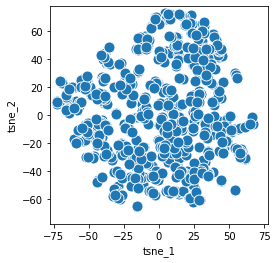

In [26]:
from sklearn.manifold import TSNE
import seaborn as sns
normalized_df=normalized_df.fillna(0)
#figure out more of these values and see how they end up impacting the values,
#maybe find out how many clear clusters we would like then run knn, would this knn show 
#properly on this data, wed do this by doing a y similar to https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
tsne=TSNE(n_components=2,perplexity=5,early_exaggeration=15)
tsne_result=tsne.fit_transform(normalized_df)
tsne_result.shape

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

In [47]:
#code for removing duplicates and adding TOT
new_df=df[df['Tm']=='TOT']
player_names=new_df['Player']
player_names_list=player_names.values.tolist()
print(player_names_list)
for player_name in player_names_list:
    df=df[df['Player']!=player_name]
df=df.append(new_df,ignore_index=True)
df.shape

[]


/var/folders/t1/7_qdq8vd1lx8zl_v58gp_g380000gn/T/ipykernel_27229/2282270377.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(new_df,ignore_index=True)


(470, 97)